# Exercício: Classificação de Roupas com o Fashion MNIST

## Importando Bibliotecas Necessárias

In [13]:
# Importando as bibliotecas
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Carregar e Pré-processar os Dados

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Imprimindo o shape
print(np.shape(x_train))
print(np.shape(x_test))

(60000, 28, 28)
(10000, 28, 28)


## Visualizando uma Amostra de Imagens

### Imagens de treino

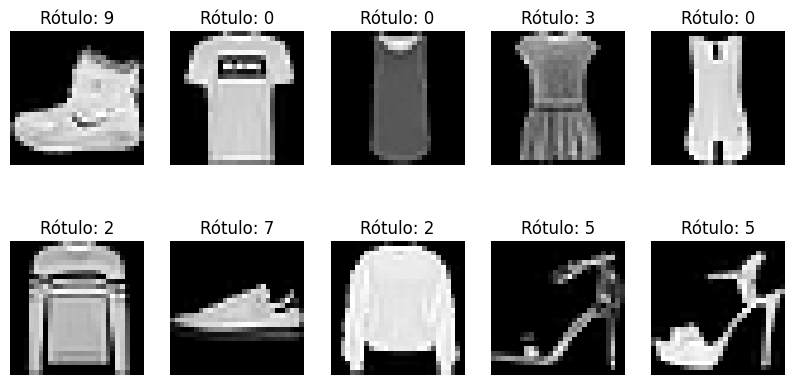

In [5]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i], cmap='gray')
    plt.axis('off')
    plt.title(f'Rótulo: {y_train[i]}')
plt.show()

### Imagens de teste

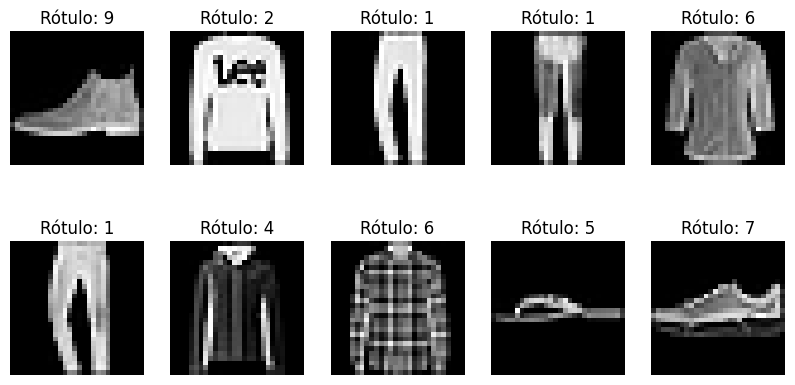

In [6]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')
    plt.title(f'Rótulo: {y_test[i]}')
plt.show()

## Definindo e Construindo o Modelo

In [7]:
model = Sequential([
    Input(shape=(28, 28)),  # Define a forma de entrada
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

## Compilando o modelo

In [8]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Treinando o modelo

In [9]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7629 - loss: 0.6785 - val_accuracy: 0.8531 - val_loss: 0.4101
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8573 - loss: 0.3961 - val_accuracy: 0.8644 - val_loss: 0.3781
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8730 - loss: 0.3392 - val_accuracy: 0.8710 - val_loss: 0.3718
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8827 - loss: 0.3169 - val_accuracy: 0.8718 - val_loss: 0.3618
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8895 - loss: 0.3005 - val_accuracy: 0.8713 - val_loss: 0.3567
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8961 - loss: 0.2788 - val_accuracy: 0.8843 - val_loss: 0.3330
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9006 - loss: 0.2717 - val_accuracy: 0.8723 - val_loss: 0.3713
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9032 - loss: 0.2570 

## Avaliando o modelo

In [10]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Acurácia no conjunto de teste: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8797 - loss: 0.3345
Acurácia no conjunto de teste: 0.8807


## Fazendo Previsões

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


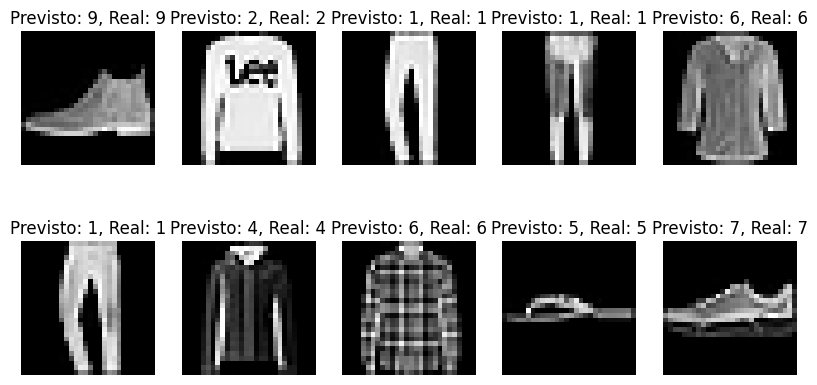

In [11]:
predictions = model.predict(x_test[:10]) # Para 10 imagens

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.axis('off')
    plt.title(f'Previsto: {np.argmax(predictions[i])}, Real: {y_test[i]}')
plt.show()

## Visualizando a Convergência do Treinamento


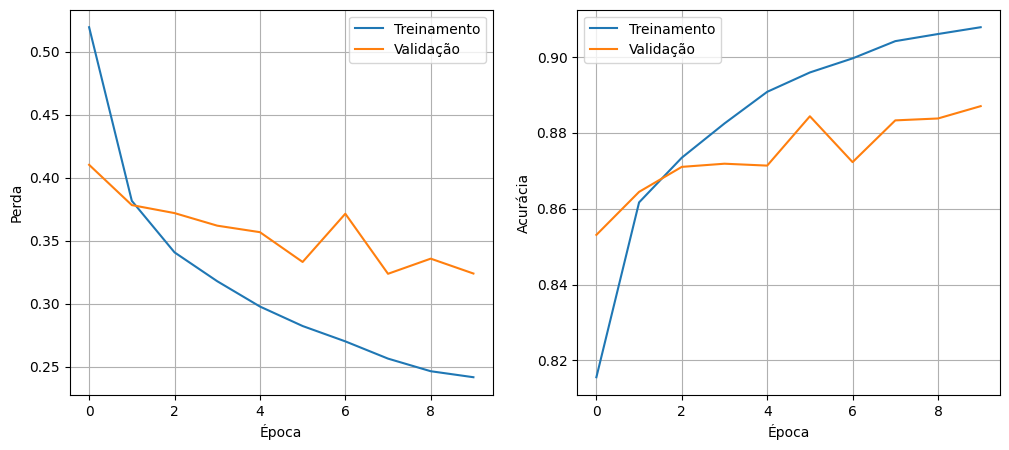

In [12]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Treinamento')
plt.plot(history.history['val_loss'], label='Validação')
plt.xlabel('Época')
plt.ylabel('Perda')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Treinamento')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

## Matriz de confusão

Aqui está a tabela com a coluna de tradução em português adicionada:

| Label | Description    | Tradução      |
|-------|----------------|---------------|
| 0     | T-shirt/top    | Camiseta/top  |
| 1     | Trouser        | Calça         |
| 2     | Pullover       | Suéter        |
| 3     | Dress          | Vestido       |
| 4     | Coat           | Casaco        |
| 5     | Sandal         | Sandália      |
| 6     | Shirt          | Camisa        |
| 7     | Sneaker        | Tênis         |
| 8     | Bag            | Bolsa         |
| 9     | Ankle boot     | Bota          |

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


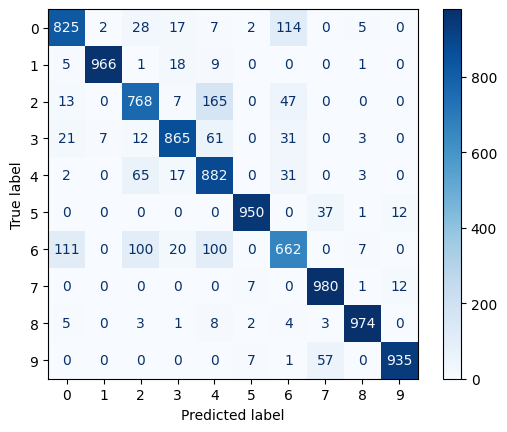

In [15]:
# Fazendo uma matriz de confusão para visualizar melhor os acertos e erros do modelo
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp = disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.show()